In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
from matplotlib import pyplot as plt
from mlp_helper import draw_neural_net, return_weights_notation
import numpy as np

In [45]:
np.random.seed(10)
X = np.random.normal(0, 10, 100)
X = np.linspace(-20, 20, 100)

In [46]:
y_0 = np.abs(X) + np.random.normal(0, 1, len(X))

In [47]:
y_1 = X>0
y_1 = X * 0

In [48]:
y = np.array([y_0, y_1]).T

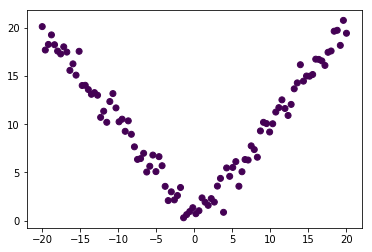

In [49]:
plt.scatter(X, y[:,0], c=y[:,1])
plt.show()

# Model

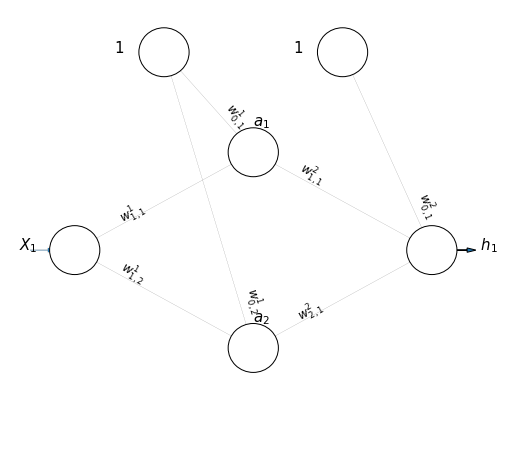

In [51]:
input_dim = 1
hidden_units = 2

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,1]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [41]:
from keras.models import Model
from keras.layers import Dense, Input

In [42]:
def get_model():
    X_in = Input(shape=(1,), name='Input')
    X = Dense(2, input_shape=(1,), activation='sigmoid', name='hidden')(X_in)
    X1 = Dense(1, name='Linear_out', activation='linear')(X)
    X2 = Dense(1, name='Categorical_out', activation='sigmoid')(X)
    model = Model(X_in, [X1, X2])
    return model
model = get_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
hidden (Dense)                  (None, 2)            4           Input[0][0]                      
__________________________________________________________________________________________________
Linear_out (Dense)              (None, 1)            3           hidden[0][0]                     
__________________________________________________________________________________________________
Categorical_out (Dense)         (None, 1)            3           hidden[0][0]                     
Total params: 10
Trainable params: 10
Non-trainable params: 0
_______________________________________________

In [26]:
losses = {'Linear_out': 'mse', 'Categorical_out': 'binary_crossentropy'}
metrics = {'Linear_out': 'mse', 'Categorical_out': 'accuracy'}
loss_weights = {'Linear_out': 1, 'Categorical_out': 10}

In [27]:
from keras.optimizers import Adam, SGD
model.compile(Adam(lr=0.1), loss=losses, metrics=metrics, loss_weights=loss_weights)

In [28]:
model.fit(X, [y[:,0], y[:,1]], verbose=0, epochs=1000, batch_size=32)

In [29]:
model.evaluate(X, [y[:,0], y[:,1]])

100/100 [==============================] - 0s 3ms/step


[1.9670407092571258,
 1.9669299554824828,
 1.1075862568645789e-05,
 1.9669299554824828,
 1.0]

In [30]:
model.metrics_names

['loss',
 'Linear_out_loss',
 'Categorical_out_loss',
 'Linear_out_mean_squared_error',
 'Categorical_out_acc']

In [31]:
y_pred = model.predict(X)

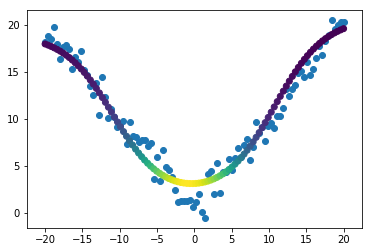

In [32]:
plt.scatter(X, y[:, 0])
plt.scatter(X, y_pred[0], c=y_pred[1])